<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/Seminar_13_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

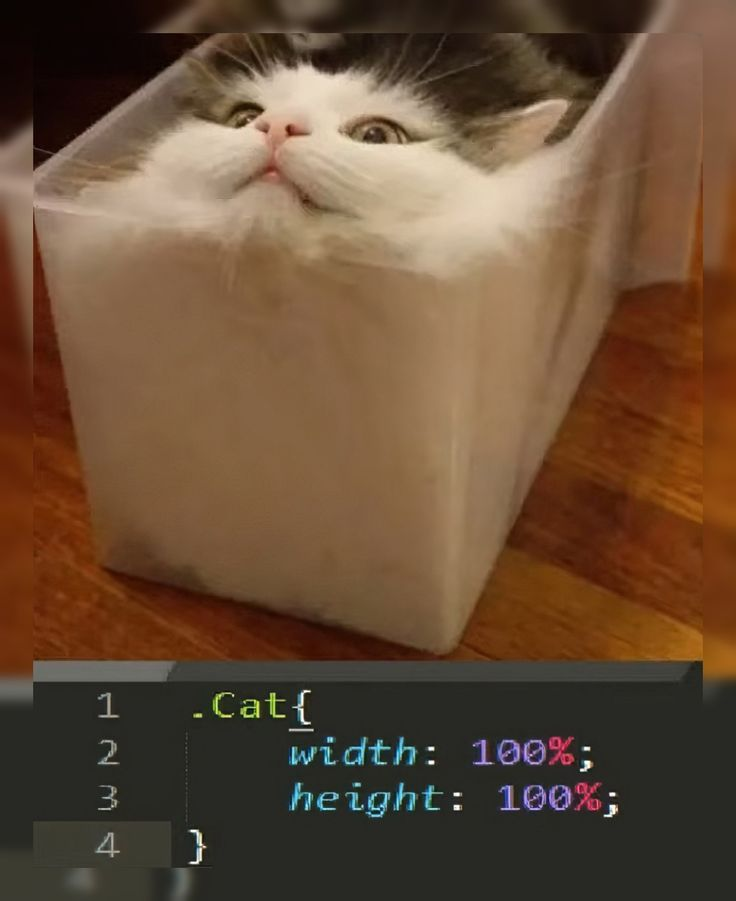

# Структура данных AVL-дерева

**AVL-дерево** — это сбалансированное по высоте бинарное дерево поиска. Название происходит от фамилий его создателей, советских учёных Адельсона-Вельского и Ландиса, которые предложили эту структуру данных в 1962 году.

**Главная идея**: AVL-дерево автоматически поддерживает свою высоту близкой к логарифмической от числа узлов, что гарантирует время выполнения основных операций (поиск, вставка, удаление) $O(logN)$ даже в худшем случае.

Обычное бинарное дерево поиска может выродиться. Представьте, что вы вставляете в него отсортированные числа: 1, 2, 3, 4, 5.

```python
1
 \
  2
   \
    3
     \
      4
       \
        5
```

Получился просто связный список! Поиск в таком "дереве" будет занимать $O(n)$, а не $O(log N)$. AVL-дерево решает эту проблему.
Для каждого узла в AVL-дереве хранится его высота (расстояние до самого дальнего листа). На основе высот вычисляется коэффициент сбалансированности (balance factor).

**Коэффициент сбалансированности узла** = высота левого поддерева - высота правого поддерева.

* В AVL-дереве для каждого узла этот коэффициент может быть равен только -1, 0 или 1.

* Если у какого-то узла коэффициент выходит за эти пределы, дерево становится несбалансированным, и необходимо выполнить балансировку с помощью поворотов.



## Балансировка: Повороты (Rotations)
Когда после вставки или удаления нарушается условие сбалансированности (баланс фактор становится -2 или 2), дерево балансируется с помощью четырёх основных типов поворотов.

Рассмотрим узел X, у которого нарушен баланс.


### 1. Малый левый поворот (Left Rotation)
Правое поддерево узла X слишком высокое (баланс фактор = -2), и его правое поддерево R также имеет отрицательный или нулевой баланс ("Right-Right" случай).

-> "Поднимаем" правого потомка R на место X, а X становится его левым потомком.
```python
Было:
     X
    / \
   A   R
      / \
     B   C

Стало:
      R
     / \
    X   C
   / \
  A   B
```


### 2. Малый правый поворот (Right Rotation)
Левое поддерево узла X слишком высокое (баланс фактор = 2), и его левое поддерево L также имеет положительный или нулевой баланс ("Left-Left" случай).

-> "Поднимаем" левого потомка L на место X, а X становится его правым потомком.
```python
Было:
       X
      / \
     L   C
    / \
   A   B

Стало:
     L
    / \
   A   X
      / \
     B   C
```


### 3. Большой левый поворот (Left-Right Rotation)
Левое поддерево узла X слишком высокое (баланс фактор = 2), но его левый потомок L имеет отрицательный баланс ("Left-Right" случай).

-> Сначала делаем малый левый поворот для L, а затем малый правый поворот для X.
```python
Было:
        X
       / \
      L   D
     / \
    A   R
       / \
      B   C

Шаг 1: Левый поворот вокруг L
        X
       / \
      R   D
     / \
    L   C
   / \
  A   B

Шаг 2: Правый поворот вокруг X
        R
       / \
      L   X
     / \ / \
    A  B C  D
```

### 4. Большой правый поворот (Right-Left Rotation)
Правое поддерево узла X слишком высокое (баланс фактор = -2), но его правый потомок R имеет положительный баланс ("Right-Left" случай).

-> Сначала делаем малый правый поворот для R, а затем малый левый поворот для X.
```python
Было:
      A
       \
        C
       / \
      B   D
     / \
    E   F

Шаг 1: Малый правый поворот вокруг узла C
Сначала выполняем правый поворот вокруг проблемного правого потомка (C):
      A
       \
        B
       / \
      E   C
         / \
        F   D

Шаг 2: Малый левый поворот вокруг узла A
Теперь выполняем левый поворот вокруг исходного корня (A):
        B
       / \
      A   C
     /   / \
    E   F   D
```

## Вставка в AVL-дерево

Однако после вставки коэффициент баланса каждого узла проверяется на пути обратно к корню. Если какой-либо узел становится несбалансированным (то есть его коэффициент баланса меньше -1 или больше +1), требуется вращение для восстановления свойства AVL.



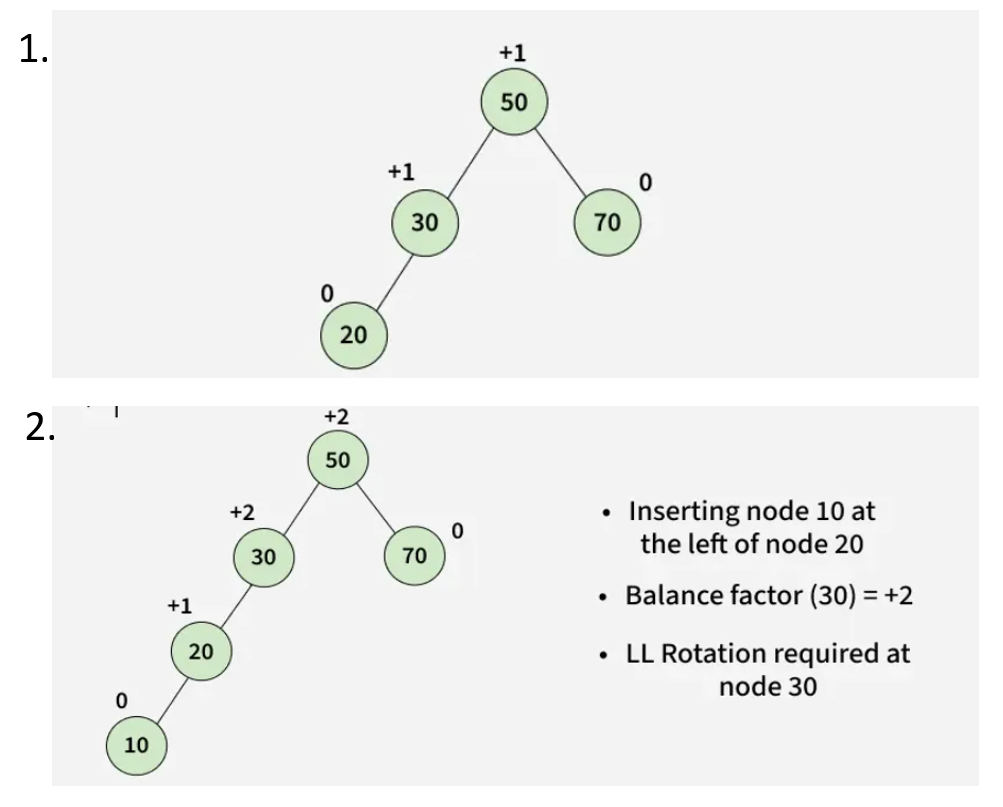

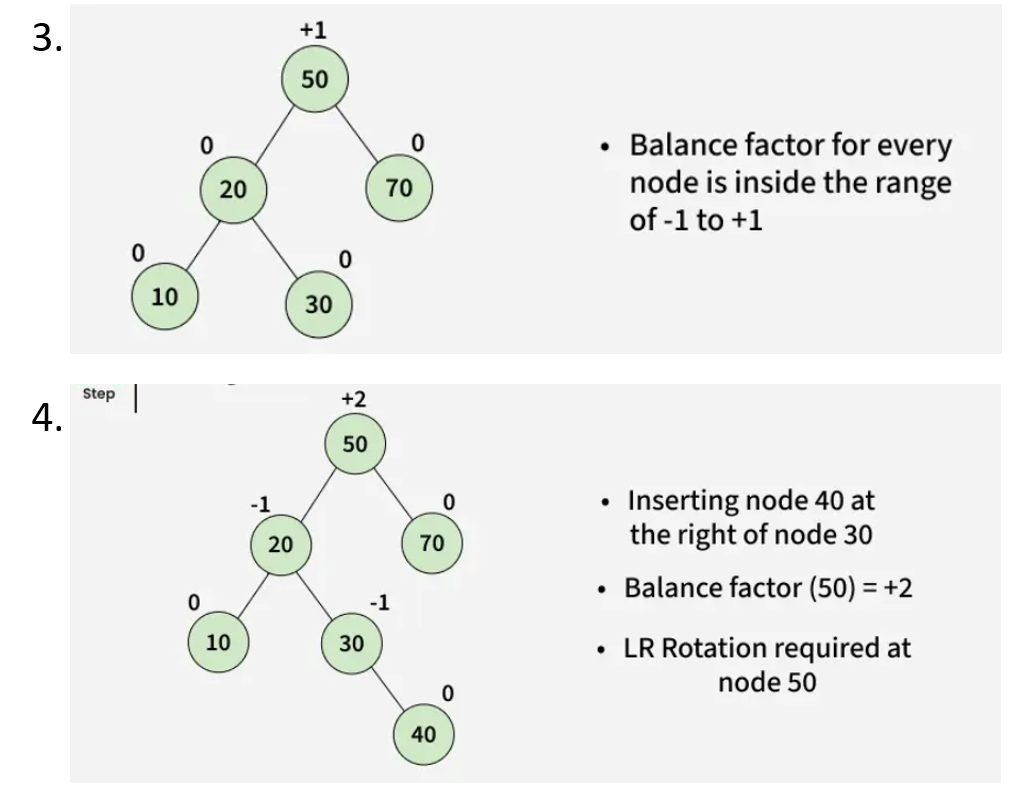

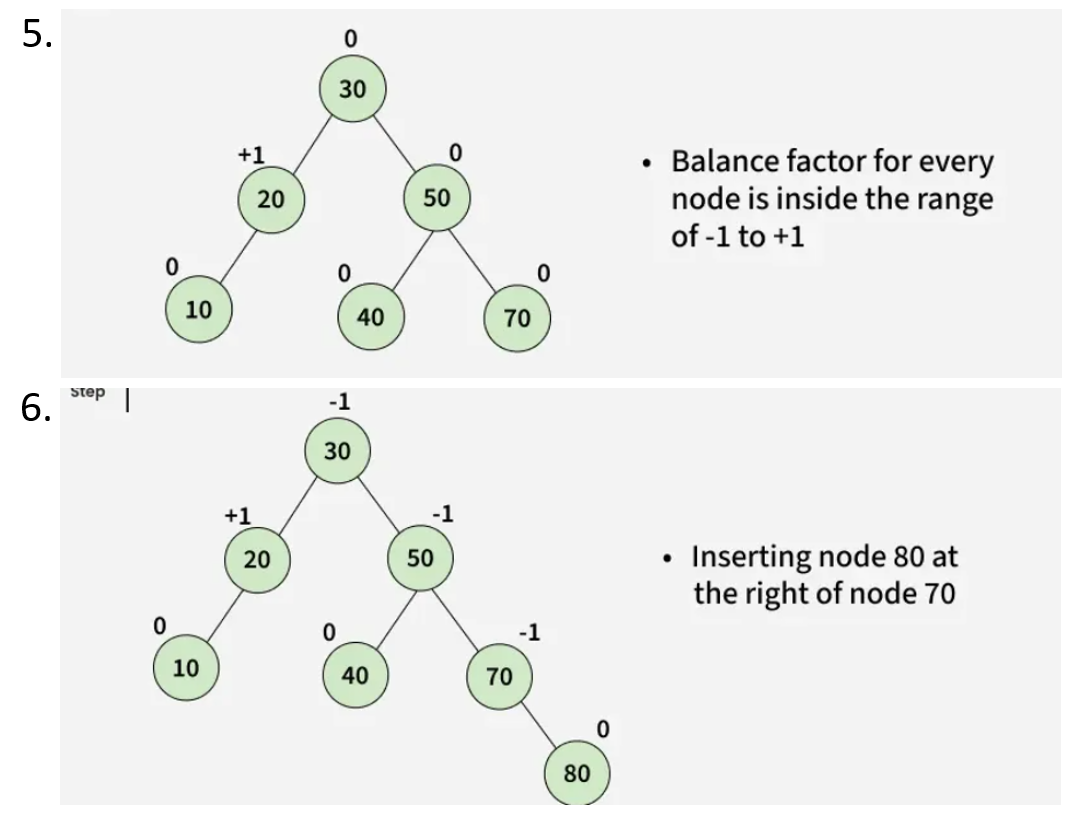

**Подход**: Идея заключается в использовании рекурсивной вставки BST, после вставки мы получаем указания на всех предков один за другим снизу вверх. Так что нам не нужен родительский указатель, чтобы подняться вверх. Сам рекурсивный код поднимается и посещает всех предков недавно вставленного узла.

Следуйте указанным ниже шагам для реализации идеи:

- Выполните обычную вставку BST.
- Текущий узел должен быть одним из предков недавно вставленного узла. - - - - Обновите высоту текущего узла.
- Получите коэффициент баланса (высота левого поддерева — высота правого поддерева) текущего узла.
- Если коэффициент баланса больше 1, то текущий узел несбалансирован, и мы находимся либо в случае Left Left, либо Left Right. Чтобы проверить, является ли он left left случаем, сравните только что вставленный ключ с ключом в левом корне поддерева.
- Если коэффициент баланса меньше -1, то текущий узел несбалансирован, и мы находимся либо в случае Правый-Правый, либо Правый-Левый. Чтобы проверить, является ли это Right Right случаем, сравните только что вставленный ключ с ключом в корне правого поддерева.

In [1]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

# A utility function to get the
# height of the tree
def height(node):
    if not node:
        return 0
    return node.height

# A utility function to right rotate
# subtree rooted with y
def right_rotate(y):
    x = y.left
    T2 = x.right

    # Perform rotation
    x.right = y
    y.left = T2

    # Update heights
    y.height = 1 + max(height(y.left), height(y.right))
    x.height = 1 + max(height(x.left), height(x.right))

    # Return new root
    return x

# A utility function to left rotate
# subtree rooted with x
def left_rotate(x):
    y = x.right
    T2 = y.left

    # Perform rotation
    y.left = x
    x.right = T2

    # Update heights
    x.height = 1 + max(height(x.left), height(x.right))
    y.height = 1 + max(height(y.left), height(y.right))

    # Return new root
    return y

# Get balance factor of node N
def get_balance(node):
    if not node:
        return 0
    return height(node.left) - height(node.right)

# Recursive function to insert a key in
# the subtree rooted with node
def insert(node, key):

    # Perform the normal BST insertion
    if not node:
        return Node(key)

    if key < node.key:
        node.left = insert(node.left, key)
    elif key > node.key:
        node.right = insert(node.right, key)
    else:
        # Equal keys are not allowed in BST
        return node

    # Update height of this ancestor node
    node.height = 1 + max(height(node.left), height(node.right))

    # Get the balance factor of this ancestor node
    balance = get_balance(node)

    # If this node becomes unbalanced,
    # then there are 4 cases

    # Left Left Case
    if balance > 1 and key < node.left.key:
        return right_rotate(node)

    # Right Right Case
    if balance < -1 and key > node.right.key:
        return left_rotate(node)

    # Left Right Case
    if balance > 1 and key > node.left.key:
        node.left = left_rotate(node.left)
        return right_rotate(node)

    # Right Left Case
    if balance < -1 and key < node.right.key:
        node.right = right_rotate(node.right)
        return left_rotate(node)

    # Return the (unchanged) node pointer
    return node

# A utility function to print preorder
# traversal of the tree
def pre_order(root):
    if root:
        print(root.key, end=" ")
        pre_order(root.left)
        pre_order(root.right)

# Driver code
root = None

# Constructing tree given in the above figure
root = insert(root, 10)
root = insert(root, 20)
root = insert(root, 30)
root = insert(root, 40)
root = insert(root, 50)
root = insert(root, 25)

# The constructed AVL Tree would be
#        30
#       /  \
#      20   40
#     /  \    \
#    10  25   50

# Preorder traversal
pre_order(root)

30 20 10 25 40 50 

**Временная сложность**: $O(logN)$  
**Память**: $O(logN)$

*Операции вращения (вращение влево и вправо) занимают постоянное время, так как меняется лишь несколько указателей. Обновление высоты и получение коэффициента баланса тоже требуют постоянного времени. Таким образом, временная сложность вставки AVL остаётся такой же, как и у вставки BST, которая равна O(h), где h — высота дерева. Поскольку дерево AVL сбалансировано, высота — O(logn). Таким образом, временная сложность вставки AVL равна O(logn).*

## Удаление в древе AVL

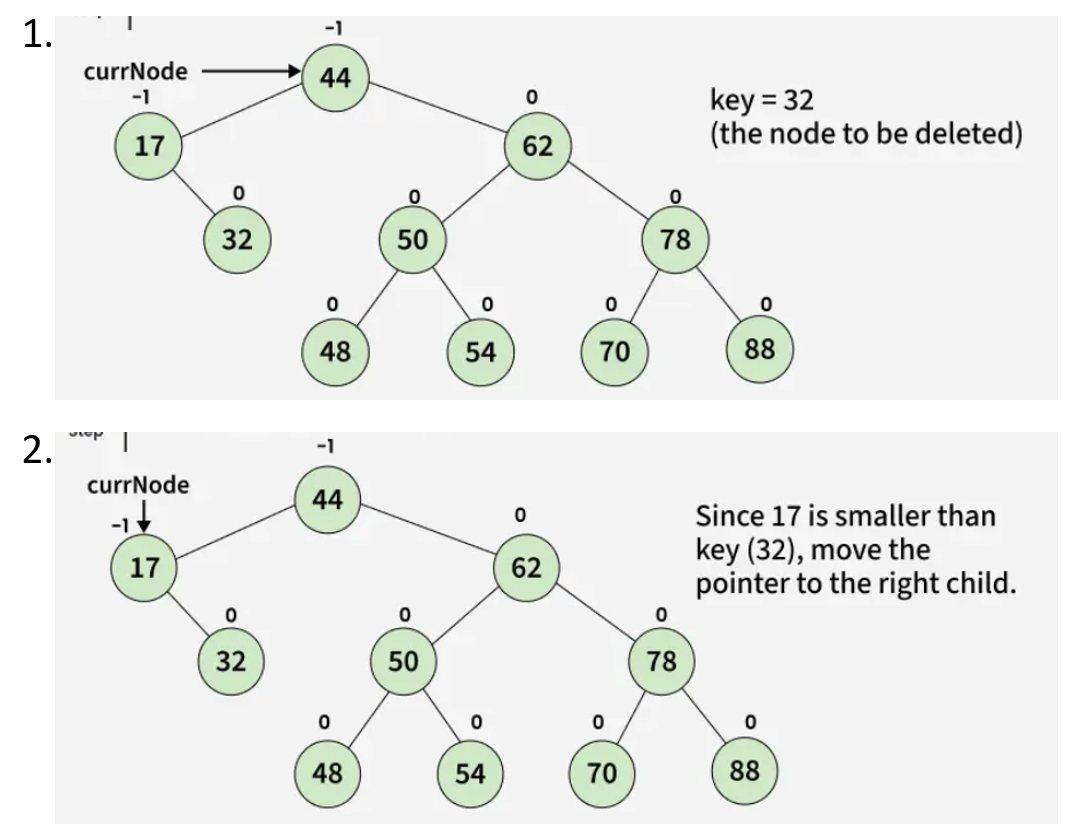

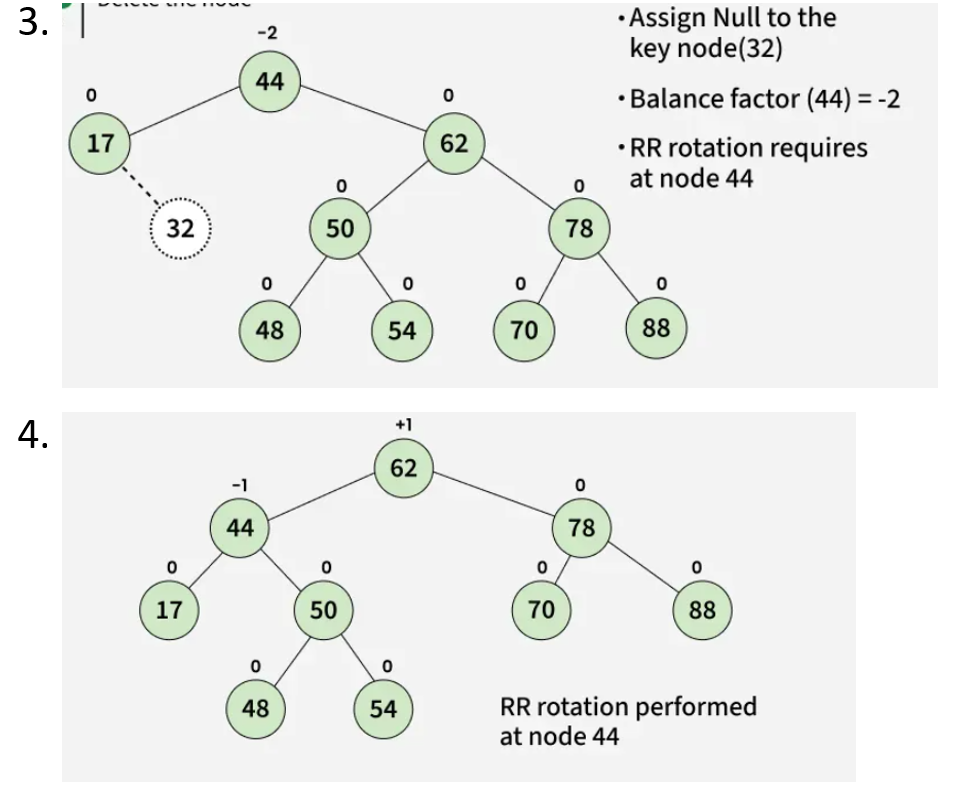

In [2]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

def height(N):
    if N is None:
        return 0
    return N.height

def right_rotate(y):
    x = y.left
    T2 = x.right

    # Perform rotation
    x.right = y
    y.left = T2

    # Update heights
    y.height = max(height(y.left),
                   height(y.right)) + 1
    x.height = max(height(x.left),
                   height(x.right)) + 1

    # Return new root
    return x

def left_rotate(x):
    y = x.right
    T2 = y.left

    # Perform rotation
    y.left = x
    x.right = T2

    # Update heights
    x.height = max(height(x.left),
                   height(x.right)) + 1
    y.height = max(height(y.left),
                   height(y.right)) + 1

    # Return new root
    return y

def get_balance(N):
    if N is None:
        return 0
    return height(N.left) - height(N.right)

def insert(node, key):
    # 1. Perform the normal BST insertion
    if node is None:
        return Node(key)

    if key < node.key:
        node.left = insert(node.left, key)
    elif key > node.key:
        node.right = insert(node.right, key)
    else:  # Duplicate keys not allowed
        return node

    # 2. Update height of this ancestor node
    node.height = max(height(node.left),
                      height(node.right)) + 1

    # 3. Get the balance factor of this node
    # to check whether this node became
    # unbalanced
    balance = get_balance(node)

    # If this node becomes unbalanced, then
    # there are 4 cases

    # Left Left Case
    if balance > 1 and key < node.left.key:
        return right_rotate(node)

    # Right Right Case
    if balance < -1 and key > node.right.key:
        return left_rotate(node)

    # Left Right Case
    if balance > 1 and key > node.left.key:
        node.left = left_rotate(node.left)
        return right_rotate(node)

    # Right Left Case
    if balance < -1 and key < node.right.key:
        node.right = right_rotate(node.right)
        return left_rotate(node)

    return node

def min_value_node(node):
    current = node

    # loop down to find the leftmost leaf
    while current.left is not None:
        current = current.left

    return current

def delete_node(root, key):
    # STEP 1: PERFORM STANDARD BST DELETE
    if root is None:
        return root

    # If the key to be deleted is smaller
    # than the root's key, then it lies in
    # left subtree
    if key < root.key:
        root.left = delete_node(root.left, key)

    # If the key to be deleted is greater
    # than the root's key, then it lies in
    # right subtree
    elif key > root.key:
        root.right = delete_node(root.right, key)

    # if key is same as root's key, then
    # this is the node to be deleted
    else:
        # node with only one child or no child
        if root.left is None or root.right is None:
            temp = root.left if root.left else root.right

            # No child case
            if temp is None:
                root = None
            else:  # One child case
                root = temp

        else:
            # node with two children: Get the
            # inorder successor (smallest in
            # the right subtree)
            temp = min_value_node(root.right)

            # Copy the inorder successor's
            # data to this node
            root.key = temp.key

            # Delete the inorder successor
            root.right = delete_node(root.right, temp.key)

    # If the tree had only one node then return
    if root is None:
        return root

    # STEP 2: UPDATE HEIGHT OF THE CURRENT NODE
    root.height = max(height(root.left),
                      height(root.right)) + 1

    # STEP 3: GET THE BALANCE FACTOR OF THIS
    # NODE (to check whether this node
    # became unbalanced)
    balance = get_balance(root)

    # If this node becomes unbalanced, then
    # there are 4 cases

    # Left Left Case
    if balance > 1 and get_balance(root.left) >= 0:
        return right_rotate(root)

    # Left Right Case
    if balance > 1 and get_balance(root.left) < 0:
        root.left = left_rotate(root.left)
        return right_rotate(root)

    # Right Right Case
    if balance < -1 and get_balance(root.right) <= 0:
        return left_rotate(root)

    # Right Left Case
    if balance < -1 and get_balance(root.right) > 0:
        root.right = right_rotate(root.right)
        return left_rotate(root)

    return root

def pre_order(root):
    if root is not None:
        print("{0} ".format(root.key), end="")
        pre_order(root.left)
        pre_order(root.right)

# Driver Code
if __name__ == "__main__":
    root = None

    # Constructing tree given in the
    # above figure
    root = insert(root, 9)
    root = insert(root, 5)
    root = insert(root, 10)
    root = insert(root, 0)
    root = insert(root, 6)
    root = insert(root, 11)
    root = insert(root, -1)
    root = insert(root, 1)
    root = insert(root, 2)

    print("Preorder traversal of the "
          "constructed AVL tree is")
    pre_order(root)

    root = delete_node(root, 10)

    print("\nPreorder traversal after"
          " deletion of 10")
    pre_order(root)

Preorder traversal of the constructed AVL tree is
9 1 0 -1 5 2 6 10 11 
Preorder traversal after deletion of 10
1 0 -1 9 5 2 6 11 

**Временная сложность**: Операции вращения (вращение влево и вправо) занимают постоянное время, так как там меняется лишь несколько указателей. Обновление высоты и получение коэффициента баланса тоже занимают постоянное время. Таким образом, временная сложность удаления AVL остаётся такой же, как и при удалении BST, то есть $O(h)$, где $h$ — высота дерева. Поскольку дерево AVL сбалансировано, высота равна $O(log N)$. Таким образом, временная сложность удаления AVL равна $O(log N)$.

**Вспомогательное пространство**: $O(log N)$ для стека вызовов рекурсии

# Красно-чёрные деревья

https://www.geeksforgeeks.org/dsa/introduction-to-red-black-tree/

# Splay-дерево

**Splay-дерево** — это самонастраивающееся бинарное дерево поиска, которое не хранит явной информации о балансировке (нет факторов баланса или цветов). Вместо этого оно использует эвристику: недавно использованные элементы с большей вероятностью будут использованы снова.

**Эвристика** — это практический метод или правило, которое:

* Не гарантирует оптимального решения

* Не имеет строгого математического обоснования

* Но на практике часто даёт хорошие результаты за приемлемое время

**Ключевая идея**: после любой операции (поиск, вставка, удаление) найденный узел "поднимается" к корню с помощью специальной операции splay ("расширение" или "поднятие").

Операция **splay(x)** — это последовательность поворотов, которая перемещает узел x в корень дерева.

Для того, чтобы доступ к недавно найденным данным был быстрее, надо, чтобы эти данные находились ближе к корню. Этого мы можем добиться, используя различные эвристики:

* **Move to Root** — совершает повороты вокруг ребра $(x,p)$, где $x$ — найденная вершина, $p$ — ее предок, пока $x$ не окажется корнем дерева. Однако можно построить такую последовательность операций, что амортизированное время доступа к вершине будет $Ω(n)$.
* **Splay** — также совершает повороты, но чередует различные виды поворотов, благодаря чему достигается логарифмическая амортизированная оценка. Она будет подробно описана ниже.

**Пример**: При последовательном использовании операций "move to root" для вершин A и B требуется по 6 поворотов, в то время как при использовании операции "splay" для вершины B достаточно 3 поворотов.



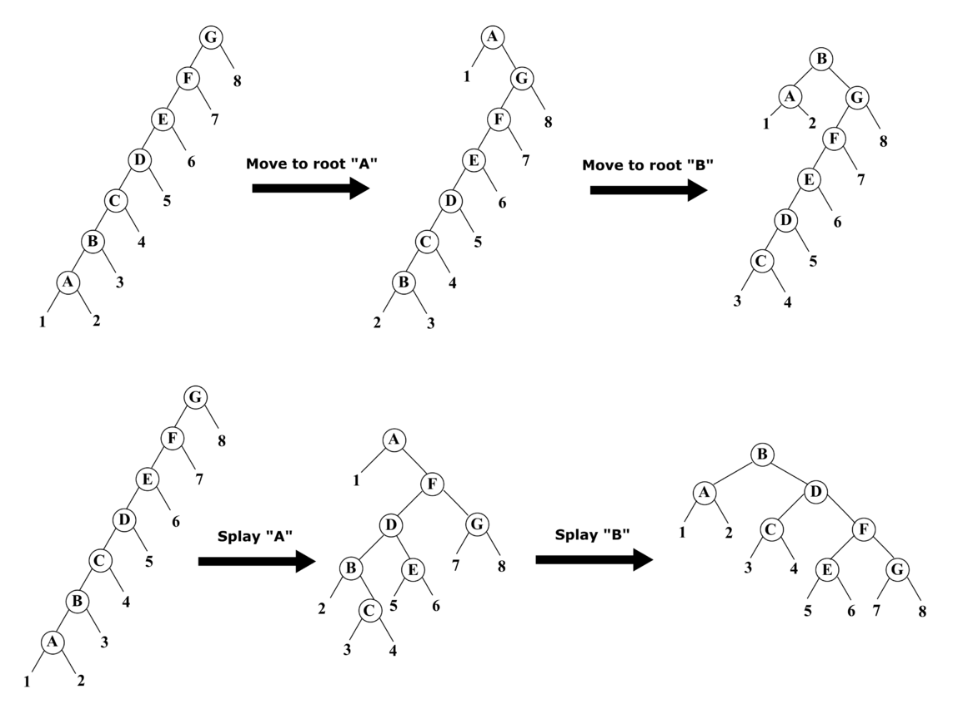

## Три случая операции splay

### 1. Zig (одиночный поворот)

Применяется, когда x — прямой ребенок корня (левый или правый).
```python
    p          x
   / \   →   / \
  x   C     A   p
 / \           / \
A   B         B   C
```


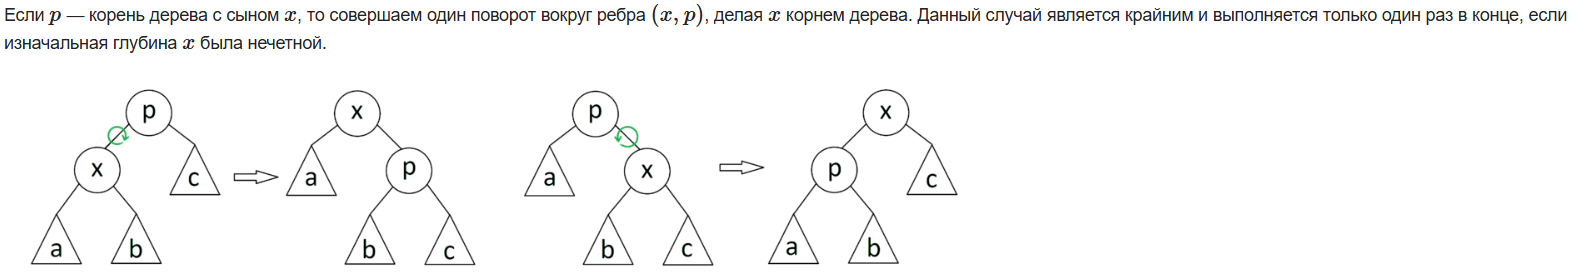

### 2. Zig-Zig (двойной поворот одного направления)
Когда x и его родитель оба левые или оба правые дети.
```python
      g          x
     / \        / \
    p   D  →   A   p
   / \            / \
  x   C          B   g
 / \                / \
A   B              C   D
```

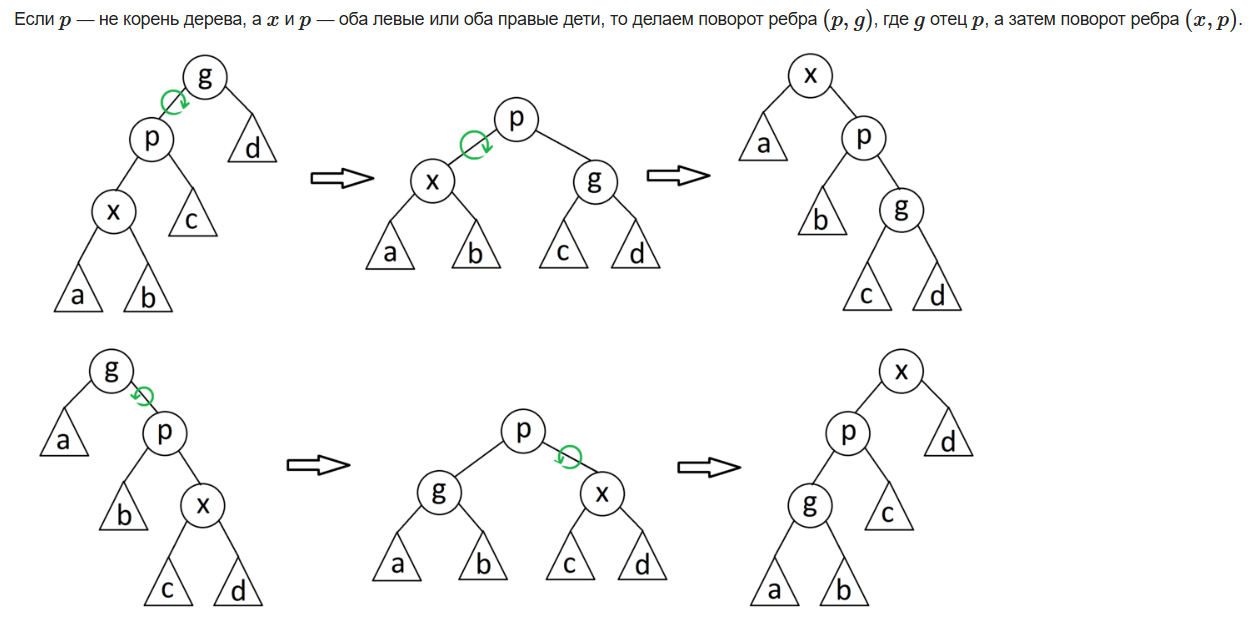

### 3. Zig-Zag (зигзагообразный поворот)
Когда x — левый ребенок, а его родитель — правый, или наоборот.
```python
    g            x
   / \          / \
  p   D   →   /   \
 / \         p     g
A   x       / \   / \
   / \     A   B C   D
  B   C
```

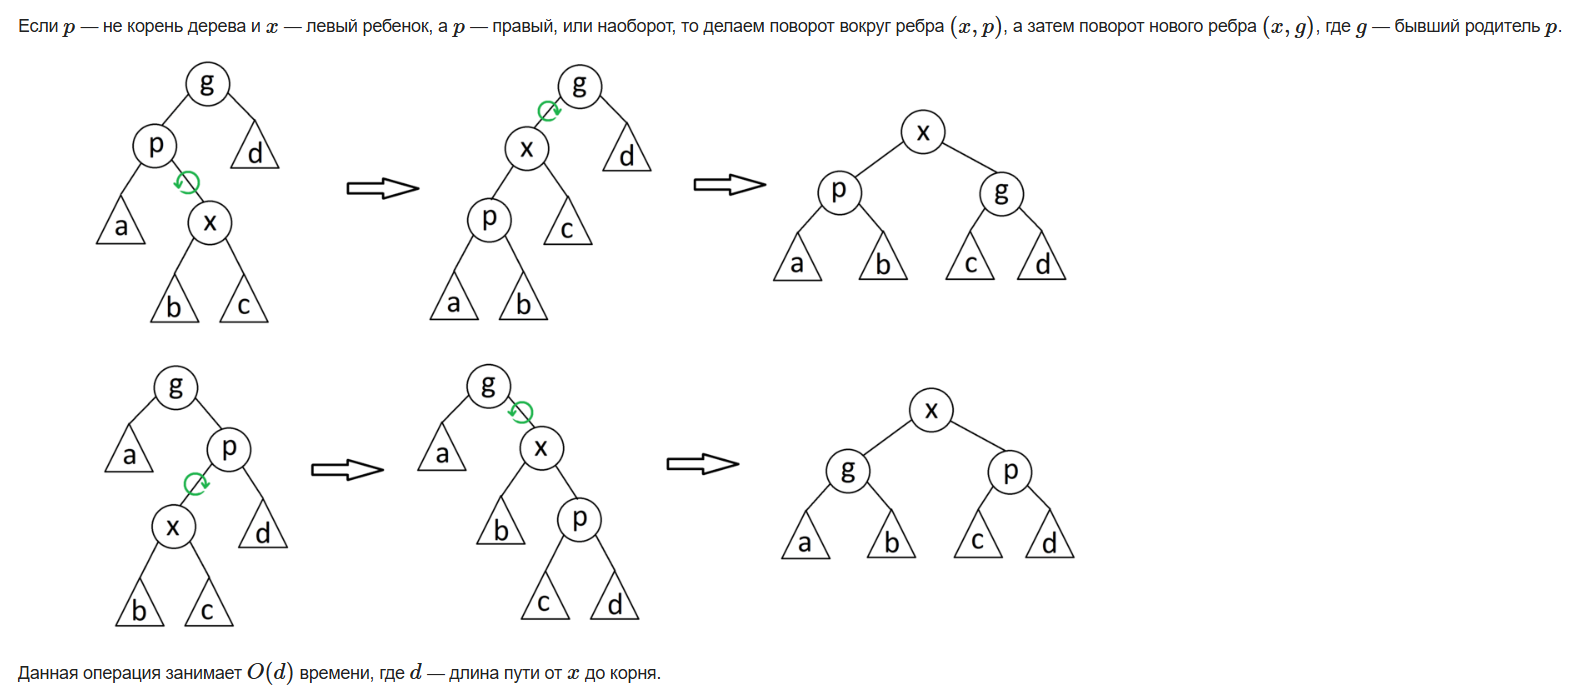

### Основные операции
**Поиск (Search)**
* Обычный поиск в BST
* Splay для найденного узла (или последнего доступного, если узел не найден)

**Вставка (Insert)**
* Обычная вставка в BST
* Splay для вставленного узла

**Удаление (Delete)**
* Splay для удаляемого узла (перемещаем его в корень)
* Удаляем корень
* Объединяем левое и правое поддеревья:
* * Splay для максимума в левом поддереве
* * Правое поддерево становится правым ребенком нового корня

Хорошая статья: https://habr.com/ru/companies/JetBrains-education/articles/210296/?ysclid=mihr0k5s1u971493004

In [3]:
class Node:
  def __init__(self, key, left = None, right = None, parent = None):
    self.left   = left
    self.right  = right
    self.parent = parent
    self.key    = key

In [4]:
def set_parent(child, parent):
  if child != None:
    child.parent = parent

def keep_parent(v):
  set_parent(v.left, v)
  set_parent(v.right, v)

In [5]:
def rotate(parent, child):
  gparent = parent.parent
  if gparent != None:
    if gparent.left == parent:
      gparent.left = child
    else:
      gparent.right = child

  if parent.left == child:
    parent.left, child.right = child.right, parent
  else:
    parent.right, child.left = child.left, parent

  keep_parent(child)
  keep_parent(parent)
  child.parent = gparent

In [ ]:
def splay(v):
  if v.parent == None:
    return v
  parent = v.parent
  gparent = parent.parent
  if gparent == None:
    rotate(parent, v)
    return v
  else:
    zigzig = (gparent.left == parent) == (parent.left == v)
    if zigzig:
      rotate(gparent, parent)
      rotate(parent, v)
    else:
      rotate(parent, v)
      rotate(gparent, v)
    return splay(v)

Процедура поиска в splay-дереве отличается от обычной только на последней стадии: после того, как вершина найдена, мы тянем ее вверх и делаем корнем через процедуру splay.

In [6]:
def find(v, key):
  if v == None:
    return None
  if key == v.key:
    return splay(v)
  if key < v.key and v.left != None:
    return find(v.left, key)
  if key > v.key and v.right != None:
    return find(v.right, key)
  return splay(v)

Чтобы реализовать вставку и удаление ключа, нам потребуются две процедуры: split и merge (разрезать и слить).

Процедура split получает на вход ключ key и делит дерево на два. В одном дереве все значения меньше ключа key, а в другом — больше. Реализуется она просто. Нужно через find найти ближайшую к ключу вершину, вытянуть ее вверх и потом отрезать либо левое, либо правое поддерево (либо оба).

In [7]:
def split(root, key):
  if root == None:
    return None, None
  root = find(root, key)
  if root.key == key:
    set_parent(root.left, None)
    set_parent(root.right, None)
    return root.left, root.right
  if root.key < key:
    right, root.right = root.right, None
    set_parent(right, None)
    return root, right
  else:
    left, root.left = root.left, None
    set_parent(left, None)
    return left, root

Чтобы вставить очередной ключ, достаточно вызвать split по нему, а затем сделать новую вершину-корень, у которой поддеревьями будет результат split-а.

In [8]:
def insert(root, key):
  left, right = split(root, key)
  root = Node(key, left, right)
  keep_parent(root)
  return root

Процедура merge получает на вход два дерева: левое left и правое right. Для корректной работы, ключи дерева left должны быть меньше ключей дерева right. Здесь мы берем вершину с наименьшим ключом правого дерева right и тянем ее вверх. После этого в качестве левого поддерева присоединяем дерево left.

In [9]:
def merge(left, right):
  if right == None:
    return left
  if left == None:
    return right
  right = find(right, left.key)
  right.left, left.parent = left, right
  return right

Для того, чтобы удалить вершину, нужно поднять ее вверх, а потом слить ее левые и правые поддеревья.

In [10]:
def remove(root, key):
  root = find(root, key)
  set_parent(root.left, None)
  set_parent(root.right, None)
  return merge(root.left, root.right)

## Амортизированная сложность
**Амортизированная сложность** — это средняя стоимость одной операции в наихудшей последовательности операций над структурой данных.

**Проще говоря**: если отдельная операция может быть дорогой, но она "подготавливает" структуру данных так, что последующие операции станут дешёвыми, то мы рассматриваем среднюю стоимость.

**Ключевая идея**:
"Дорогие операции случаются редко, поэтому их стоимость можно 'распределить' по всем операциям"

Амортизационный анализ применяют для алгоритмов, которые запускаются несколько раз. Время алгоритма может сильно колебаться, но мы оцениваем среднее или суммарное время по всем запускам. Чаще всего алгоритм реализует какую-нибудь операцию над структурой данных.

Хорошая статья: https://habr.com/ru/articles/208624/

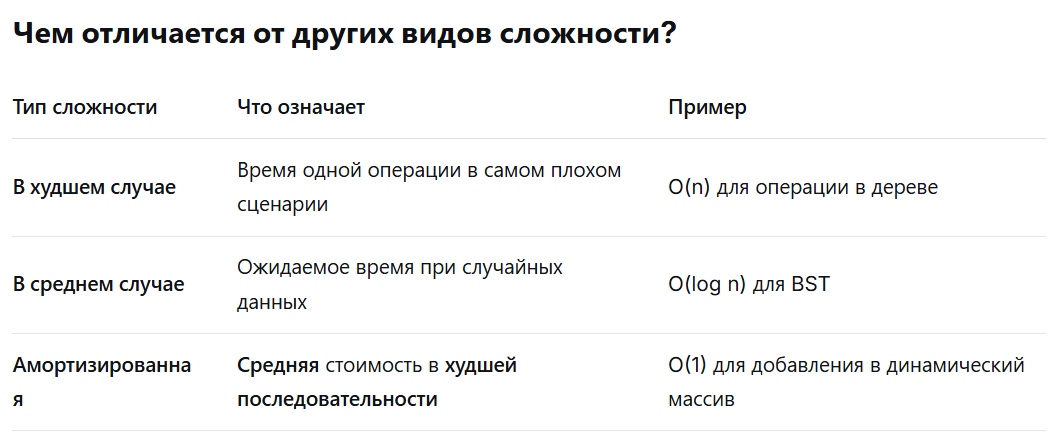

## Методы анализа амортизированной сложности

### 1. Метод агрегирования (Aggregate Method)
Считаем общую стоимость всех $n$ операций и делим на $n$.

**Пример**: Динамический массив

* Вставка $n$ элементов: $O(n)$ копирований + $O(n)$ простых вставок = $O(n)$

* Амортизированная стоимость одной вставки: $O(n)/n = O(1)$

### 2. Бухгалтерский метод (Accounting Method)
Каждой операции присваиваем "учётную стоимость". Если операция дешёвая — "платим" больше, создавая "кредит" для будущих дорогих операций.

**Пример**: Динамический массив

* Простая вставка: учётная стоимость = 3 монеты

* Реальная стоимость = 1 монета

* Излишек 2 монеты идут "в запас" для будущего расширения

### 3. Метод потенциалов (Potential Method)
Вводим функцию потенциала $Φ$, которая характеризует "состояние" структуры данных.

Амортизированная стоимость = Реальная стоимость + $ΔΦ$
(где $ΔΦ$ — изменение потенциала)

### Пример: **Динамический массив**

In [11]:
# Пример работы динамического массива
arr = []        # размер = 1
arr.append(1)   # стоимость = 1
arr.append(2)   # стоимость = 2 (увеличили размер в 2 раза, скопировали 1 элемент)
arr.append(3)   # стоимость = 1
arr.append(4)   # стоимость = 4 (увеличили размер в 2 раза, скопировали 3 элемента)
arr.append(5)   # стоимость = 1

Анализ:

* После i-го увеличения размера: следующий $i$ операций будут стоить $O(1)$

* Общая стоимость $n$ операций: $O(n)$

* Амортизированная стоимость: $O(1)$ на операцию

### **Пример**: Splay-дерево
* Отдельная операция $splay$: может стоить $O(N)$

* Но после поднятия узла, доступ к нему и соседним узлам ускоряется

* Амортизированная стоимость $M$ операций: $O(M log N)$

* Амортизированная стоимость одной операции: $O(log N)$

```python
# Временная диаграмма операций:

# Худший случай:      [■■■□□■■■□□■■■□□]  # Все операции дорогие
# Средний случай:     [■□■■□■□■□■□■□■□]  # В среднем хорошо, но нет гарантий  
# Амортизированный:   [■■■■■■■■□□□□□□□□]  # Сначала дорого, потом дёшево

# ИТОГО: все три дают одинаковую СУММАРНУЮ стоимость,
# но с разным распределением по времени
```
Учитывает взаимовлияние операций — дорогая операция может делать последующие дешёвыми!

**Поиск, вставка, удаление**: $O(log N)$

**Операция splay**: $O(log N)$